## Main Project Notebook



In [7]:
import pandas as pd 
file_path='C:/Users/Beheerder/Desktop/IronHack/Project-1111/Apple Stock Data 80-22.csv'
apple_data = pd.read_csv(file_path,delimiter=';')
apple_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [23]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Beheerder/Desktop/IronHack/Project-1111/API_NY/Global_gdp_growth_rate.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows to assess cleaning needs
df.info(), df.head()


ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69


In [25]:
# Check the first few lines of the file to identify delimiter and formatting issues
with open(file_path, "r", encoding="utf-8") as file:
    lines = [next(file) for _ in range(10)]  # Read first 10 lines

lines


['\ufeff"Data Source","World Development Indicators",\n',
 '\n',
 '"Last Updated Date","2025-01-28",\n',
 '\n',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023",\n',
 '"Aruba","ABW","GDP growth (annual %)","NY.GDP.MKTP.KD.ZG","","","","","","","","","","","","","","","","","","","","","","","","","","","","16.0784313755902","18.6486486682331","12.1298405451924","3.96140172360629","7.96287173232642","5.88235395341866","7.30769324531406","8.20390129312089","2.54714368704694","1.18578851134656","7.04687499241221","1.99198444906199",

In [27]:
# Reload the dataset, skipping metadata rows
df = pd.read_csv(file_path, skiprows=4)

# Display basic info after skipping metadata
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            145 non-null    float64
 6   1962            152 non-null    float64
 7   1963            152 non-null    float64
 8   1964            152 non-null    float64
 9   1965            152 non-null    float64
 10  1966            155 non-null    float64
 11  1967            159 non-null    float64
 12  1968            161 non-null    float64
 13  1969            161 non-null    float64
 14  1970            161 non-null    float64
 15  1971            185 non-null    float64
 16  1972            185 non-null    float64
 17  1973            185 non-null    flo

(None,
                   Country Name Country Code         Indicator Name  \
 0                        Aruba          ABW  GDP growth (annual %)   
 1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
 2                  Afghanistan          AFG  GDP growth (annual %)   
 3   Africa Western and Central          AFW  GDP growth (annual %)   
 4                       Angola          AGO  GDP growth (annual %)   
 
       Indicator Code  1960      1961      1962      1963      1964      1965  \
 0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
 1  NY.GDP.MKTP.KD.ZG   NaN  0.468736  7.869709  5.622374  4.690458  5.159574   
 2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
 3  NY.GDP.MKTP.KD.ZG   NaN  1.873054  3.712777  7.111968  5.413943  4.120855   
 4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
 
    ...      2015      2016      2017      2018      2019       2020  \
 0  .

In [29]:
# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 68"])

# Replace missing values in GDP growth rates with NaN (already handled by Pandas)
# Check for entire empty rows (if any)
df = df.dropna(how="all", subset=df.columns[4:])  # Drop rows where all GDP values are NaN

# Convert year columns to numeric type (ensuring proper dtype)
df.iloc[:, 4:] = df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

# Display cleaned dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Cleaned GDP Growth Data", dataframe=df)


ModuleNotFoundError: No module named 'ace_tools'

In [96]:
us_gdp['Year']=pd.to_numeric(us_gdp['Year'],errors='coerce')
us_gdp_filtered=us_gdp[(us_gdp['Year']>=1980) & (us_gdp['Year']<=2022)]
us_gdp_filtered.drop(columns=['Country Name'])

,Year,GDP Growth Rate
20,1980,-0.256776
21,1981,2.537701
22,1982,-1.803014
23,1983,4.583791
24,1984,7.236453
25,1985,4.169575
26,1986,3.462655
27,1987,3.454630
28,1988,4.176982
29,1989,3.672238


In [90]:
us_gdp_filtered.describe()

,Year,GDP Growth Rate
count,43.000000,43.000000
mean,2001.000000,2.628949
std,12.556539,1.968714
min,1980.000000,-2.576500
25%,1990.500000,1.944912
50%,2001.000000,2.751796
75%,2011.500000,3.810272
max,2022.000000,7.236453


In [42]:
#Calculate average yearly stock prices
apple_data['Date']=pd.to_datetime(apple_data['Date'])

#dt. to extract time; 
apple_data['Year']=apple_data['Date'].dt.year

apple_data['Year']

0        1980
1        1980
2        1980
3        1980
4        1980
         ... 
10404    2022
10405    2022
10406    2022
10407    2022
10408    2022
Name: Year, Length: 10409, dtype: int32

In [48]:
annual_mean=apple_data.groupby('Year')[['High','Low','Close']].mean().reset_index()
annual_mean

,Year,High,Low,Close
0,1980,0.136461,0.135903,0.135903
1,1981,0.109265,0.108548,0.108548
2,1982,0.086665,0.084630,0.085459
3,1983,0.171085,0.163449,0.167274
4,1984,0.122294,0.117642,0.119651
5,1985,0.092023,0.089937,0.090233
6,1986,0.147048,0.142207,0.144913
7,1987,0.355806,0.339820,0.347751
8,1988,0.376663,0.365092,0.370884
9,1989,0.377679,0.365881,0.371953


In [88]:
annual_mean.describe()

,Year,High,Low,Close
count,43.000000,43.000000,43.000000,43.000000
mean,2001.000000,16.613342,16.242356,16.435466
std,12.556539,36.575862,35.706042,36.160941
min,1980.000000,0.086665,0.084630,0.085459
25%,1990.500000,0.323207,0.311728,0.317724
50%,2001.000000,0.496445,0.481831,0.489309
75%,2011.500000,15.090402,14.795443,14.939986
max,2022.000000,169.582456,165.126842,167.447018


<Axes: xlabel='Year', ylabel='High'>

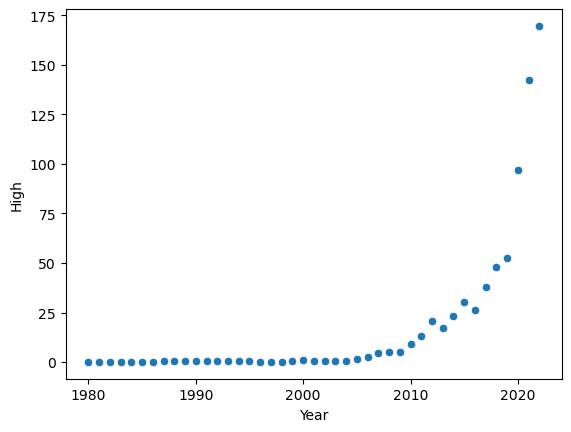

In [52]:
import seaborn as sns
sns.scatterplot(x='Year',y='High',data=annual_mean)

<Axes: xlabel='Year', ylabel='Low'>

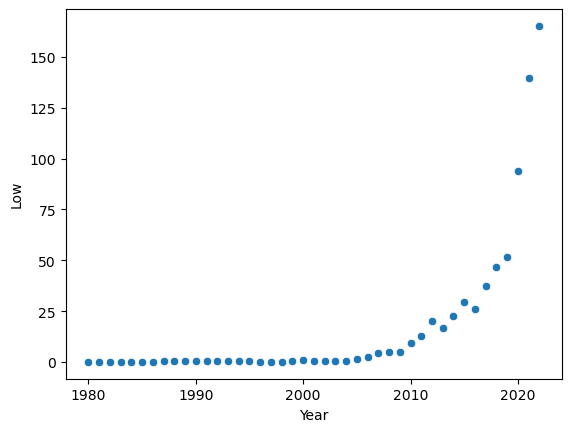

In [54]:
sns.scatterplot(x='Year',y='Low',data=annual_mean)

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

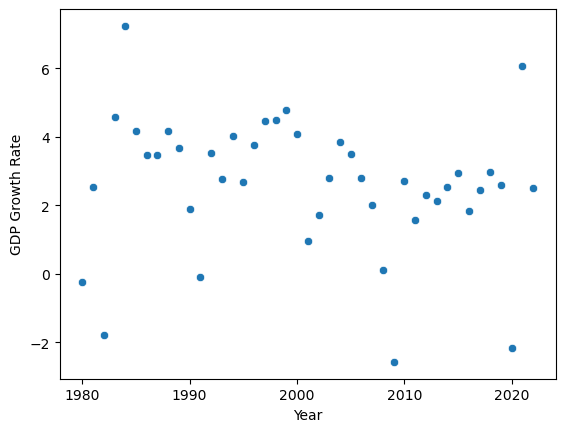

In [78]:
sns.scatterplot(x='Year',y='GDP Growth Rate',data=us_gdp_filtered)
#merged data for gdp & stock
#apple doesn't drive gdp of a country 

In [107]:
merged_data=pd.merge(us_gdp_filtered[['Year','GDP Growth Rate']],annual_mean[['Year', 'High']],on='Year',how='inner')
merged_data

,Year,GDP Growth Rate,High
0,1980,-0.256776,0.136461
1,1981,2.537701,0.109265
2,1982,-1.803014,0.086665
3,1983,4.583791,0.171085
4,1984,7.236453,0.122294
5,1985,4.169575,0.092023
6,1986,3.462655,0.147048
7,1987,3.454630,0.355806
8,1988,4.176982,0.376663
9,1989,3.672238,0.377679


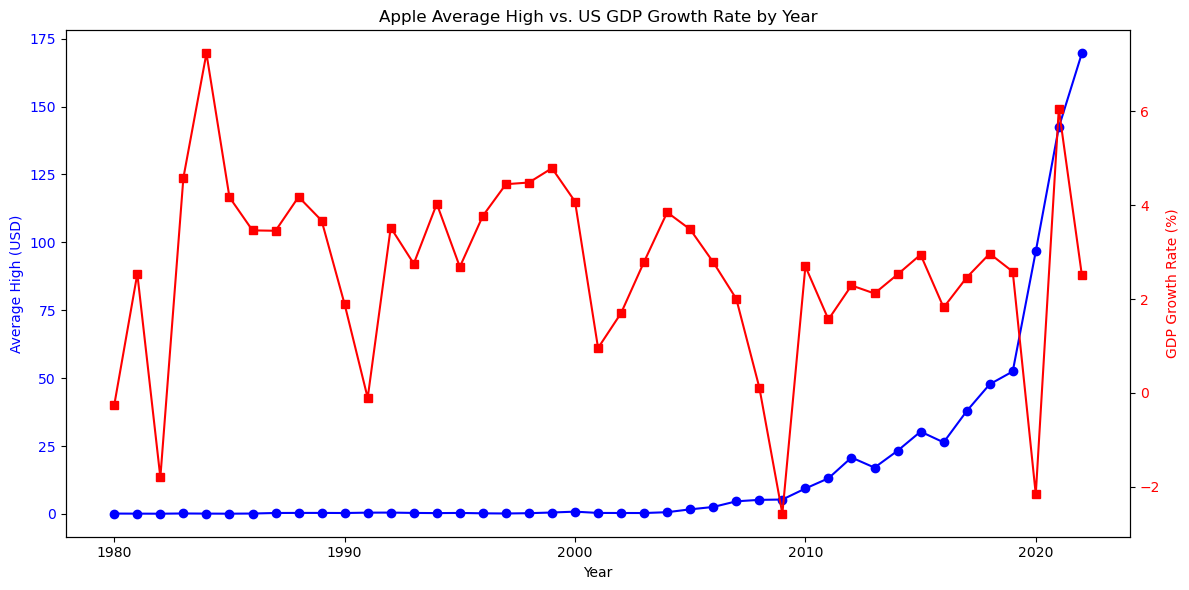

In [109]:
import matplotlib.pyplot as plt

# Create a figure and a primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average 'High' stock price on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average High (USD)', color='blue')
ax1.plot(merged_data['Year'], merged_data['High'], color='blue', marker='o', label='Average High')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis sharing the same x-axis for GDP Growth Rate
ax2 = ax1.twinx()
ax2.set_ylabel('GDP Growth Rate (%)', color='red')
ax2.plot(merged_data['Year'], merged_data['GDP Growth Rate'], color='red', marker='s', label='GDP Growth Rate')
ax2.tick_params(axis='y', labelcolor='red')

# Title and show the plot
plt.title('Apple Average High vs. US GDP Growth Rate by Year')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [82]:
#Annual Return is change in stock price year over year;
annual_avg['Annual Return'] = annual_avg['Close'].pct_change() * 100
annual_avg['Annual Return']


0            NaN
1     -20.128506
2     -21.270752
3      95.736252
4     -28.469911
5     -24.586255
6      60.597642
7     139.972578
8       6.652209
9       0.288157
10     -9.834594
11     39.755320
12      4.396828
13    -25.137431
14    -16.930780
15     18.954051
16    -38.531416
17    -27.900664
18     70.118718
19     89.008642
20     58.254099
21    -55.767638
22     -5.341354
23     -3.107114
24     91.574012
25    162.764119
26     51.706634
27     81.150615
28     10.684253
29      3.405513
30     76.987370
31     40.086545
32     58.253537
33    -17.952416
34     36.649368
35     30.103994
36    -12.859040
37     43.924768
38     25.574278
39     10.157195
40     83.134405
41     47.869628
42     18.765708
Name: Annual Return, dtype: float64

In [3]:
merged_data = pd.merge(annual_avg, us_gdp_filtered, on='Year', how='inner')
correlation = merged_data['Annual Return'].corr(merged_data['GDP Growth Rate'])
print("Correlation between Annual Return and GDP Growth Rate:", correlation)


NameError: name 'pd' is not defined

In [1]:
# Load the newly uploaded Global GDP Growth dataset
gdp_csv_file_path = "C:/Users/Beheerder/Desktop/IronHack/Project-1111/Global_gdp_growth_rate.csv"

# Read the CSV file
df_gdp = pd.read_csv(gdp_csv_file_path, skiprows=4)

# Filter for U.S. data
us_gdp_data = df_gdp[df_gdp["Country Name"] == "United States"].copy()

# Drop unnecessary columns
us_gdp_data = us_gdp_data.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], errors="ignore")

# Convert wide format to long format
us_gdp_long = us_gdp_data.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="GDP Growth (%)"
)

# Convert data types
us_gdp_long["Year"] = pd.to_numeric(us_gdp_long["Year"], errors="coerce")
us_gdp_long["GDP Growth (%)"] = pd.to_numeric(us_gdp_long["GDP Growth (%)"], errors="coerce")

# Drop missing values
us_gdp_long = us_gdp_long.dropna(subset=["GDP Growth (%)"])

# Filter data for 1980-2023
us_gdp_recent = us_gdp_long[(us_gdp_long["Year"] >= 1980) & (us_gdp_long["Year"] <= 2023)].copy()

# Compute a 5-year rolling average for GDP Growth
us_gdp_recent["Rolling Avg (5Y)"] = us_gdp_recent["GDP Growth (%)"].rolling(window=5).mean()

# Plot U.S. GDP Growth with a 5-Year Rolling Average
plt.figure(figsize=(12, 6))
plt.plot(us_gdp_recent["Year"], us_gdp_recent["GDP Growth (%)"], marker='o', linestyle='-', linewidth=2, label="GDP Growth (%)")
plt.plot(us_gdp_recent["Year"], us_gdp_recent["Rolling Avg (5Y)"], color='r', linestyle='--', linewidth=2, label="5-Year Rolling Avg")

# Formatting
plt.title("U.S. GDP Growth Trends (1980-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


NameError: name 'pd' is not defined